#### Decision Tree

**Decision Tree** is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.


In [22]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

# read data set and display
df = pandas.read_csv("../data/shows.csv")
display(df.head(3))


,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO


In [23]:
# to create a decision tree all the data should be numerical.
# hence we need to map the non-numerical data to numerical values.
countries = {'UK': 0, 'USA': 1, 'N': 2}
choice = {'YES': 1, 'NO': 0}

# pandas map func. takes a dictionary to map values
df['Nationality'] = df['Nationality'].map(countries)
df['Go'] = df['Go'].map(choice)

display(df.head(3))


,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0


In [24]:
features = ['Age', 'Experience', 'Rank', 'Nationality']  # deciding features

X = df[features]
y = df['Go']

print("independent variables (X)")
display(X.head(3))

print("dependent variables (y)")
display(y.head(3))


independent variables (X)


,Age,Experience,Rank,Nationality
0,36,10,9,0
1,42,12,4,1
2,23,4,6,2


dependent variables (y)


0    0
1    0
2    0
Name: Go, dtype: int64

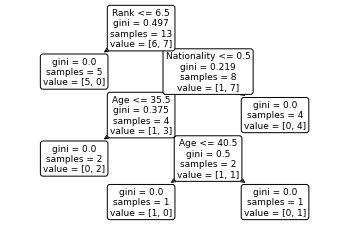

In [25]:
dtree = DecisionTreeClassifier()    # decision tree model
dtree = dtree.fit(X.values, y)      # fit data set

data = tree.plot_tree(dtree, feature_names=features, rounded=True, fontsize=9)


In [26]:
# prediction: should I go see a show starring a 40 years old American comedian,
# with 10 years of experience, and a comedy ranking of 7?
res = dtree.predict([[40, 10, 7, 1]])               # [1] = YES   [0] = NO
print(res, "=", "YES" if res[0] == 1 else "NO")


[1] = YES


#### Result Explained

The decision tree uses your earlier decisions to calculate the odds for you to wanting to go see a comedian or not.
Let us read the different aspects of the decision tree:

![decision-tree-1](../docs/decisiontree1.JPG)

**_Rank <= 6.5_** means that every comedian with a rank of 6.5 or lower will follow the True arrow (to the left), and the rest will follow the False arrow (to the right).

**_gini = 0.497_** refers to the quality of the split, and is always a number between 0.0 and 0.5, where 0.0 would mean all of the samples got the same result, and 0.5 would mean that the split is done exactly in the middle.

**_samples = 13_** means that there are 13 comedians left at this point in the decision, which is all of them since this is the first step.

**_value = [6, 7]_** means that of these 13 comedians, 6 will get a "NO", and 7 will get a "GO".

```
GINI
There are many ways to split the samples, we use the GINI method in this tutorial.
The Gini method uses this formula:

Gini = 1 - (x/n)2 - (y/n)2

Where x is the number of positive answers("GO"), n is the number of samples, and y is the number of negative answers ("NO"), which gives us this calculation:

1 - (7 / 13)2 - (6 / 13)2 = 0.497
```

![decision-tree-2](../docs/decisiontree2.JPG)

The next step contains two boxes, one box for the comedians with a 'Rank' of 6.5 or lower, and one box with the rest.

True - 5 Comedians End Here:

**_gini = 0.0_** means all of the samples got the same result.

**_samples = 5_** means that there are 5 comedians left in this branch (5 comedian with a Rank of 6.5 or lower).

**_value = [5, 0]_** means that 5 will get a "NO" and 0 will get a "GO".

False - 8 Comedians Continue:

**_Nationality <= 0.5_** means that the comedians with a nationality value of less than 0.5 will follow the arrow to the left (which means everyone from the UK, ), and the rest will follow the arrow to the right.

**_gini = 0.219_** means that about 22% of the samples would go in one direction.

**_samples = 8_** means that there are 8 comedians left in this branch (8 comedian with a Rank higher than 6.5).

**_value = [1, 7]_** means that of these 8 comedians, 1 will get a "NO" and 7 will get a "GO".
